Download and extract data

In [1]:
import urllib.request
import tarfile
import os

if os.path.isdir('MovieSummaries') == False:
    print("Downloading and extracting data...")
    data_tar_link = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
    ftpstream = urllib.request.urlopen(data_tar_link)

    data_tar_file = tarfile.open(fileobj=ftpstream, mode="r|gz")
    data_tar_file.extractall()
    
    print("Dataset downloaded and extracted.")
else:
    print("Dataset already downloaded")

print("Data size: ", sum(os.path.getsize(os.path.join('MovieSummaries', f)) / (1024.0*1024.0)
          for f in os.listdir('MovieSummaries')
          if os.path.isfile(os.path.join('MovieSummaries', f))), "MB")
# this should take less than two minutes (depends mostly on connection speed), if it takes longer 
# check if MovieSummaries directory is created in working directory and some files are in it

Dataset already downloaded
Data size:  127.5914134979248 MB


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
header_metadata = ['wikiID', 'freebaseID', 'name', 'release_date', 'box_office', 'runtime', 'language', 'country', 'genre']
movie_metadata = pd.read_csv('./MovieSummaries/movie.metadata.tsv', sep='\t', names=header_metadata)

In [4]:
print(len(movie_metadata))
movie_metadata.head()

81741


,wikiID,freebaseID,name,release_date,box_office,runtime,language,country,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


Maknimo nepotrebne retke

In [5]:
movie_metadata = movie_metadata.drop(
    columns=['freebaseID', 'release_date', 'box_office', 'runtime', 'country', 'language'])

In [6]:
movie_metadata.head(20)

,wikiID,name,genre
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"
5,13696889,The Gangsters,"{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,The Sorcerer's Apprentice,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,Alexander's Ragtime Band,"{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,Contigo y aquí,"{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,City of the Dead,"{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


Pretvorimo genre stupac tako da mu elementi sadrze skupove zanrova, a ne json format s IDevima

In [7]:
import json

set(json.loads(movie_metadata['genre'][0]).values())

{'Action',
 'Adventure',
 'Horror',
 'Science Fiction',
 'Space western',
 'Supernatural',
 'Thriller'}

In [8]:
movie_metadata['genre'] = movie_metadata['genre'].apply(lambda x: set(json.loads(x).values()))

In [9]:
movie_metadata.head()

,wikiID,name,genre
0,975900,Ghosts of Mars,"{Thriller, Horror, Supernatural, Action, Scien..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{Biographical film, Crime Drama, Mystery, Drama}"
2,28463795,Brun bitter,"{Crime Fiction, Drama}"
3,9363483,White Of The Eye,"{Thriller, Erotic thriller, Psychological thri..."
4,261236,A Woman in Flames,{Drama}


In [10]:
len(movie_metadata)

81741

Postoje filmovi na raznim jezicima, ali su sazetci radnje filma preuzeti s engleske wikipedije stoga je to OK.

Pogledajmo kakvi sve zanrovi filmova postoje u datasetu

In [11]:
all_genres = {genre for genre_set in movie_metadata['genre'] for genre in genre_set}

In [12]:
len(all_genres)

363

In [13]:
from collections import Counter

count_genres = Counter([genre for genre_set in movie_metadata['genre'] for genre in genre_set])

In [14]:
hard_limit = 100

print(sum(x[1] for x in count_genres.most_common(363)[hard_limit:]))
print(sum(x[1] for x in count_genres.most_common(363)[:hard_limit]))

print(sum(x[1] for x in count_genres.most_common(363)[hard_limit:]) / 
     sum(x[1] for x in count_genres.most_common(363)))

13741
229587
0.0564711007364545


In [15]:
count_genres.most_common(hard_limit)

[('Drama', 34007),
 ('Comedy', 16349),
 ('Romance Film', 10234),
 ('Black-and-white', 9094),
 ('Action', 8798),
 ('Thriller', 8744),
 ('Short Film', 8141),
 ('World cinema', 7155),
 ('Crime Fiction', 6948),
 ('Indie', 6897),
 ('Documentary', 5630),
 ('Horror', 5280),
 ('Silent film', 5250),
 ('Adventure', 4963),
 ('Family Film', 4598),
 ('Action/Adventure', 4561),
 ('Comedy film', 4362),
 ('Musical', 4160),
 ('Animation', 3534),
 ('Romantic drama', 3372),
 ('Mystery', 3195),
 ('Science Fiction', 3052),
 ('Fantasy', 2820),
 ('Romantic comedy', 2680),
 ('War film', 2652),
 ('Japanese Movies', 2322),
 ('Western', 2225),
 ('Crime Thriller', 2122),
 ('Period piece', 1758),
 ('Comedy-drama', 1720),
 ('Film adaptation', 1531),
 ('Chinese Movies', 1525),
 ('Biography', 1392),
 ('Psychological thriller', 1331),
 ('Bollywood', 1321),
 ('Sports', 1206),
 ('Biographical film', 1198),
 ('LGBT', 1163),
 ('Music', 1088),
 ('Family Drama', 1043),
 ('Black comedy', 1025),
 ('Parody', 999),
 ('Televisio

In [16]:
genre_transform = {
    'Romance film': ['Romance'],
    'Family Film': ['Family'],
    'Action/Adventure': ['Action', 'Adventure'],
    'Romantic drama': ['Romance', 'Drama'],
    'Romantic comedy': ['Romance', 'Comedy'],
    'Crime Thriller': ['Crime', 'Thriller'],
    'Crime Fiction': ['Crime', 'Fiction'],
    'Comedy-drama': ['Comedy', 'Drama'],
    'Psychological thriller': ['Psychological', 'Thriller'],
    'Biographical film': ['Biography'],
    'Family Drama': ['Family', 'Drama'],
    'Children\'s/Family': ['Children\'s'],
    'Political drama': ['Political', 'Drama'],
    'Historical fiction': ['History', 'Fiction'],
    'Crime Drama': ['Crime', 'Drama'],
    'Action Thrillers': ['Action', 'Thriller'],
    'Docudrama': ['Documentary', 'Drama'],
    'Political cinema': ['Political'],
    'Detective fiction': ['Detective', 'Fiction'],
    'Historical drama': ['History', 'Drama'],
    'Crime Comedy': ['Crime', 'Comedy'],
    'Children\'s Fantasy': ['Children\'s', 'Fantasy'],
    'Family-Oriented Adventure': ['Family', 'Adventure'],
    'Courtroom Drama': ['Crime', 'Drama'],
    'Political thriller': ['Political', 'Thriller'],
    'Horror Comedy': ['Horror', 'Comedy'],
}

genre_drop = {'Black-and-white', 'Short Film', 'Silent film', 'Indie', 'World cinema',
             'Japanese Movies', 'Chinese Movies', 'Film adaptation', 'B-movie', 'Ensemble Film'}

drop_least_frequent_n = 40

genre_drop = genre_drop.union({x[0] for x in count_genres.most_common(363)[drop_least_frequent_n:]})

def standardize_genres(genre_set, genre_transform=genre_transform, genre_drop=genre_drop):
    genre_set = genre_set.difference(genre_drop)
    
    for old_genre, new_genre in genre_transform.items():
        if old_genre not in genre_set:
            continue

        genre_set = genre_set.union(new_genre).difference({old_genre})
        
    return genre_set

In [17]:
for value in movie_metadata['genre'].head(20):
    print(value)

{'Thriller', 'Horror', 'Supernatural', 'Action', 'Science Fiction', 'Adventure', 'Space western'}
{'Biographical film', 'Crime Drama', 'Mystery', 'Drama'}
{'Crime Fiction', 'Drama'}
{'Thriller', 'Erotic thriller', 'Psychological thriller'}
{'Drama'}
{'Silent film', 'Short Film', 'Black-and-white', 'Comedy', 'Indie'}
{'Fantasy', 'Adventure', 'World cinema', 'Family Film'}
{'Musical', 'Black-and-white', 'Comedy'}
{'Musical', 'Drama', 'Comedy'}
{'Horror', 'Supernatural'}
{'Black-and-white', 'Drama'}
{'Thriller', 'World cinema', 'Crime Fiction', 'Action/Adventure', 'Japanese Movies'}
{'Romance Film', 'Drama', 'Comedy-drama', 'Ensemble Film', 'Romantic comedy', 'Comedy', 'Romantic drama'}
{'Film adaptation', 'Drama', 'War film', 'Costume drama', 'Period piece', 'Epic'}
{'Comedy'}
{'Animation', 'Action', 'Science Fiction', 'Short Film', 'Fantasy', 'Adventure', 'Family Film'}
{'Drama'}
{'Drama', "Children's/Family", "Children's Fantasy", 'Comedy', 'Fantasy', 'Musical', 'Family Film'}
set()
{'

In [18]:
for value in movie_metadata['genre'].head(20).apply(standardize_genres):
    print(value)

{'Thriller', 'Horror', 'Action', 'Science Fiction', 'Adventure'}
{'Biography', 'Mystery', 'Drama'}
{'Crime', 'Fiction', 'Drama'}
{'Thriller', 'Psychological'}
{'Drama'}
{'Comedy'}
{'Fantasy', 'Adventure', 'Family'}
{'Musical', 'Comedy'}
{'Musical', 'Drama', 'Comedy'}
{'Horror'}
{'Drama'}
{'Fiction', 'Thriller', 'Action', 'Crime', 'Adventure'}
{'Romance Film', 'Romance', 'Drama', 'Comedy'}
{'War film', 'Period piece', 'Drama'}
{'Comedy'}
{'Animation', 'Action', 'Science Fiction', 'Family', 'Fantasy', 'Adventure'}
{'Drama'}
{'Drama', 'Comedy', 'Family', 'Fantasy', 'Musical'}
set()
{'Drama'}


In [19]:
movie_metadata['standard_genre'] = movie_metadata['genre'].apply(standardize_genres)

In [20]:
print(len(movie_metadata[movie_metadata['standard_genre'] == set()]))
print(len(movie_metadata))
print(len(movie_metadata[movie_metadata['standard_genre'] == set()]) / len(movie_metadata))

8616
81741
0.10540609975410137


In [21]:
movie_metadata = movie_metadata[movie_metadata['standard_genre'] != set()]

In [22]:
len(movie_metadata)

73125

In [23]:
count_genres = Counter([genre for genre_set in movie_metadata['standard_genre'] for genre in genre_set])

len(count_genres)

27

Pogledajmo razne distribucije zanrova

/home/ltomic/anaconda3/envs/strojno/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


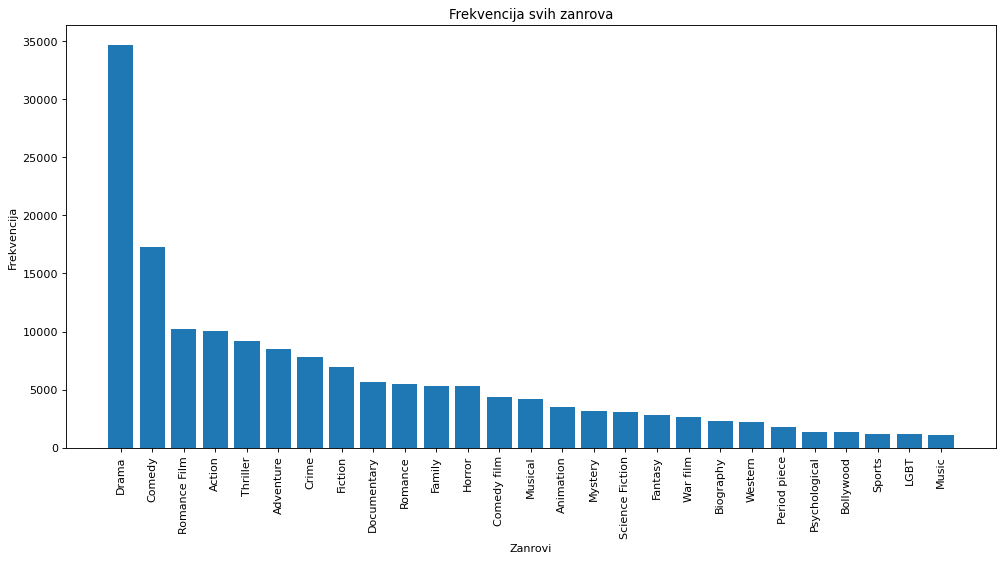

In [24]:
plt.figure(figsize=(15, 7), dpi=80)
plt.bar([x[0] for x in count_genres.most_common()], [x[1] for x in count_genres.most_common()])

plt.xlabel("Zanrovi")
plt.ylabel("Frekvencija")
plt.title('Frekvencija svih zanrova')

ax = plt.gca()
ax.set_xticklabels([x[0] for x in count_genres.most_common()], rotation = 90)

plt.show()

Pogledajmo distribuciju broja zanrova po filmu

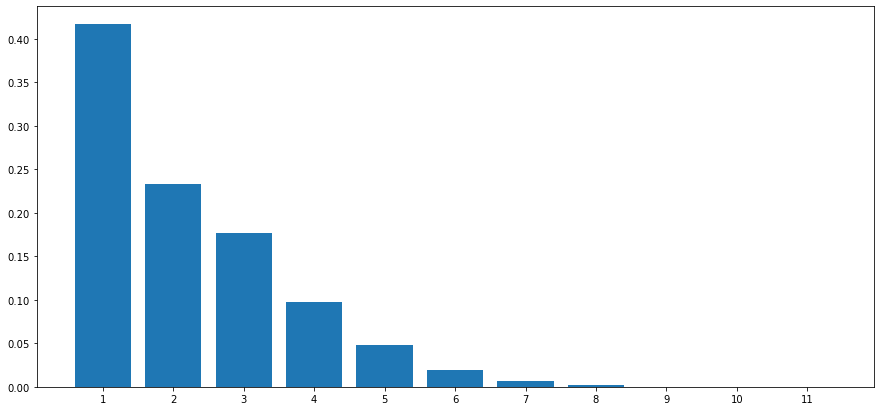

In [26]:
plt.figure(figsize=(15, 7))

genre_per_movie_counts = movie_metadata['standard_genre'].apply(len).value_counts()

plt.bar(x=genre_per_movie_counts.index, 
        height=genre_per_movie_counts / sum(genre_per_movie_counts),
       tick_label=genre_per_movie_counts.index)

plt.show()

In [27]:
movie_metadata = movie_metadata.drop(columns=['genre'])

In [28]:
movie_metadata.to_pickle('movie_metadata.pkl')